> # **MNIST - IMAGE CLASSIFICATION**

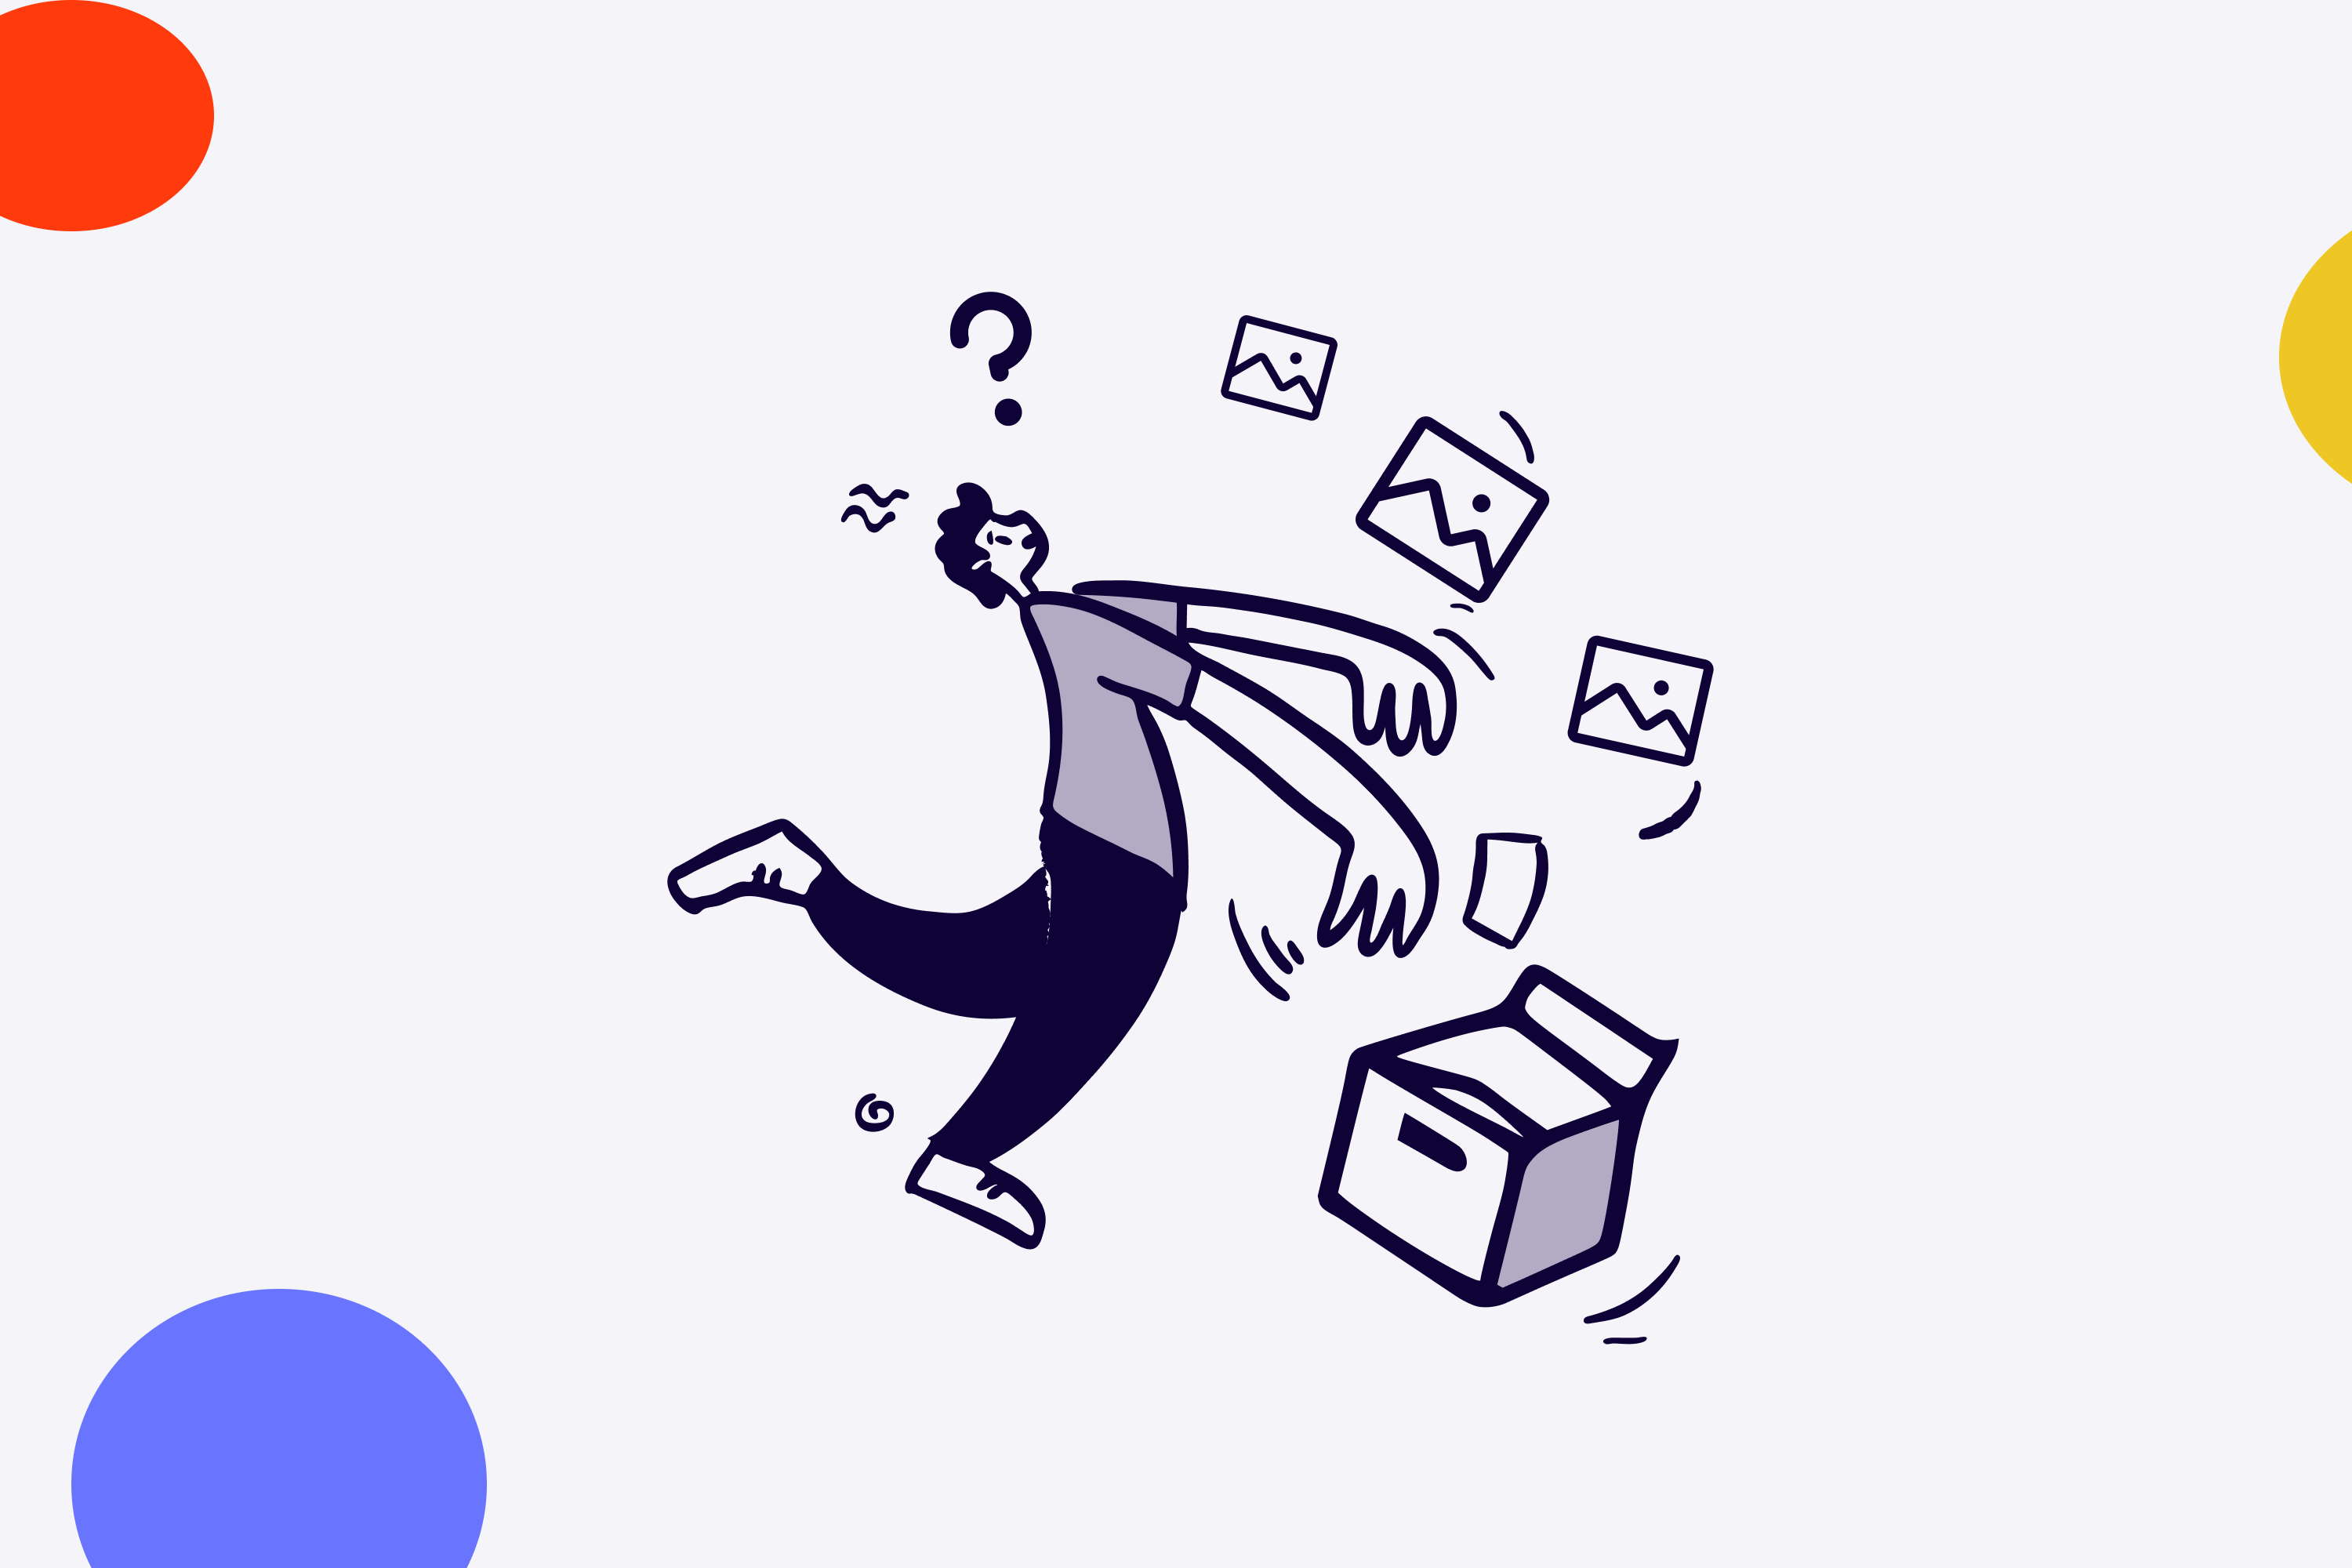

> ### ABOUT MNIST DATASET
> - **Features**: MNIST consists of 70,000 images of handwritten digits. These digits range from 0 to 9.
>
> - **Image Details**: Each image is a grayscale, 28x28 pixel square, which means each image contains 784 pixels (28x28=784), with each pixel value ranging from 0 (black) to 255 (white).
>
> - **Structure**: 60,000 images, used to train machine learning models. 10,000 images, used to evaluate the performance of the models.
>
> - **Labeling**: Each image is labeled with the corresponding digit it represents, making it a supervised learning dataset where the goal is to train a model to correctly classify these handwritten digits.

<hr>

> ### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> # **DATASET OVERVIEW AND VISULIZATION**

In [2]:
mnist = pd.read_csv('data.csv')
mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


> ### REPRESENTATION OF DIGIT

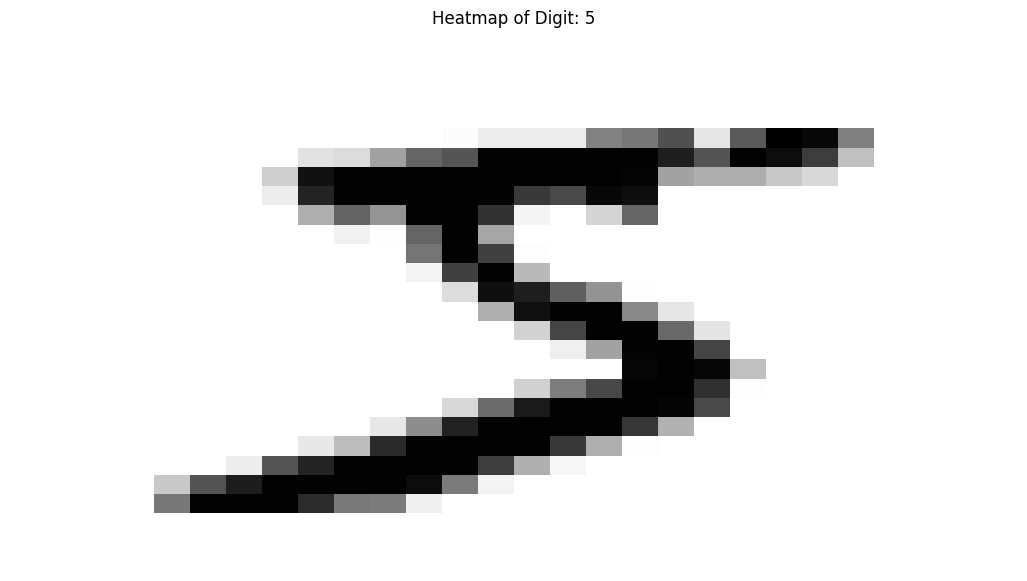

In [3]:
import seaborn as sns

digit = np.array(mnist.iloc[:1, :784]).reshape(28, 28)
plt.figure(figsize=(13, 7))
sns.heatmap(digit, cmap='binary', cbar=None)
plt.title(f"Heatmap of Digit: {mnist.iloc[:1, -1:].values[0, 0]}")
plt.axis(False)
plt.show()

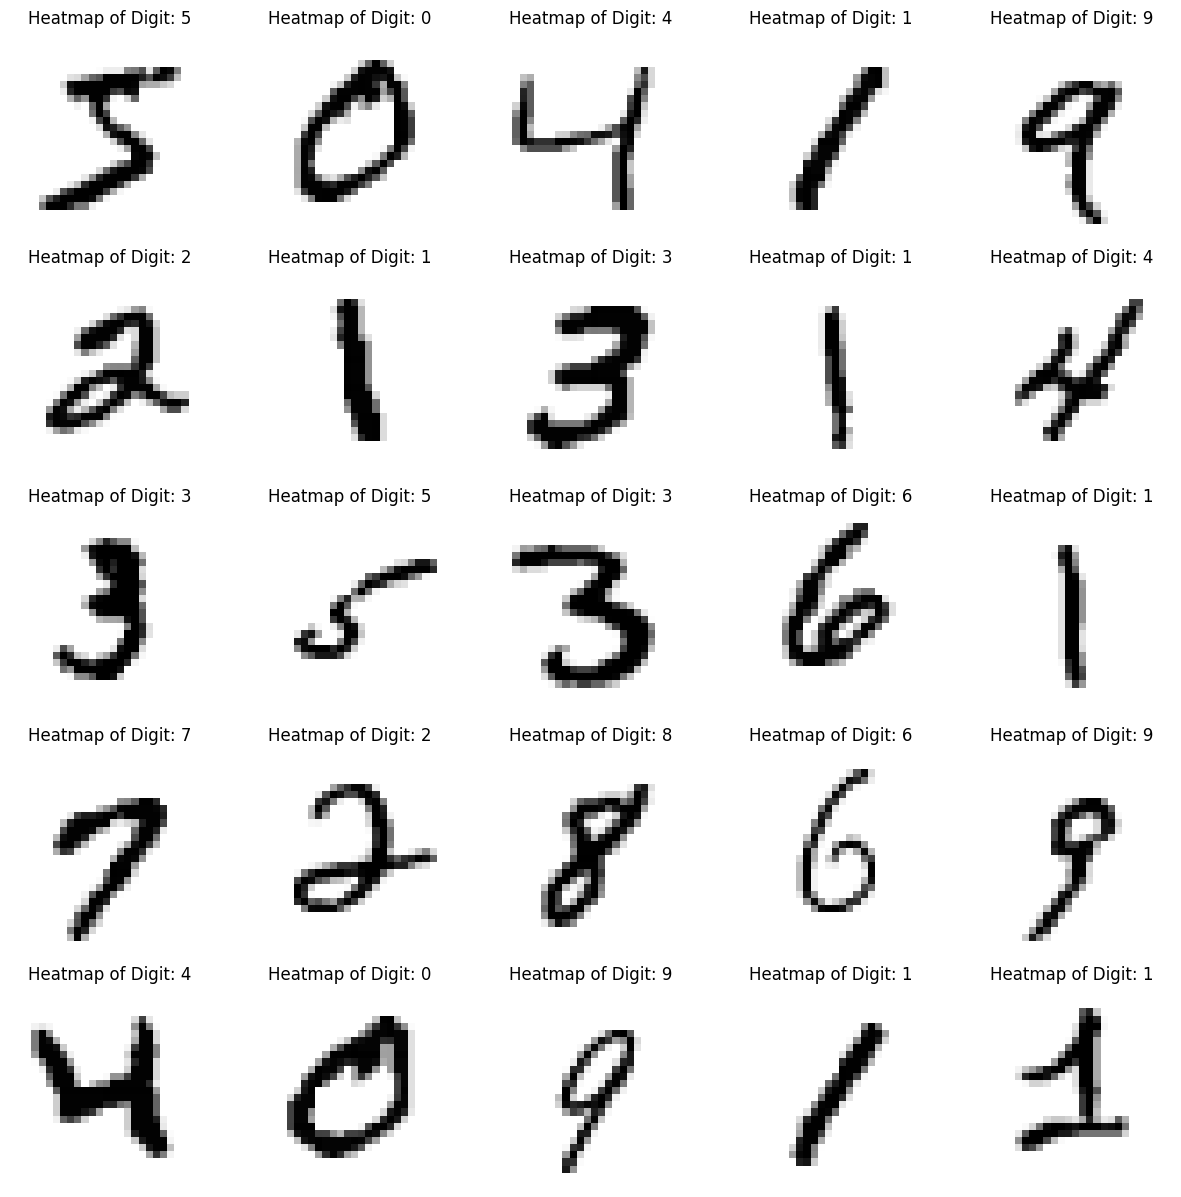

In [4]:
fig, ax = plt.subplots(nrows = 5, ncols = 5)
fig.set_figheight(15)
fig.set_figwidth(15)

idx = 0

for i in range(5):
    for j in range(5):
        digit = np.array(mnist.iloc[idx:1 + idx, :784]).reshape(28, 28)
        ax[i, j].imshow(digit, cmap='binary')
        ax[i, j].axis("off")
        ax[i, j].set_title(f"Heatmap of Digit: {mnist.iloc[idx:idx + 1, -1:].values[0, 0]}")
        idx += 1

plt.show()

In [5]:
mnist['class'].value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

<hr>

> # **DATA SAMPLING - `StratifiedShuffleSplit`**

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10)

for train_idx, test_idx in split.split(X=mnist, y=mnist['class']):
    train_set = mnist.iloc[train_idx]
    test_set = mnist.iloc[test_idx]

In [7]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [8]:
y_train.value_counts().sort_index()

class
0    6213
1    7089
2    6291
3    6427
4    6142
5    5682
6    6188
7    6564
8    6142
9    6262
Name: count, dtype: int64

In [9]:
y_test.value_counts().sort_index()

class
0    690
1    788
2    699
3    714
4    682
5    631
6    688
7    729
8    683
9    696
Name: count, dtype: int64

<hr>

> # **TRAINING A BINARY CLASSIFIER**

>Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

> ### MODEL TRAINING - `SGDClassifier`

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)
y_pred = sgd_clf.predict(X_test)

> ### CROSS VALIDATION

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    sgd_clf,
    X = X_train,
    y = y_train_5,
    cv = 3,
    scoring = 'accuracy'
)

print(scores)

[0.96747619 0.96519048 0.94004762]


> ### MODEL TRAINING - `DummyClassifier`

In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(random_state = 42)
dummy_clf.fit(X_train, y_train_5)
y_pred = dummy_clf.predict(X_test)

In [14]:
score = cross_val_score(
    dummy_clf,
    X = X_train,
    y = y_train_5,
    cv = 5,
    scoring = 'accuracy'
)

print(score)

[0.90984127 0.90984127 0.90984127 0.9097619  0.9097619 ]


In [15]:
print(y_test_5[y_test_5 == False].shape)
print(y_test_5[y_test_5 == True].shape)

print(y_pred[y_pred == False].shape)
print(y_pred[y_pred == True].shape)

# This is also calculated using Confusion Matrix

(6369,)
(631,)
(7000,)
(0,)


> The reason behind `Accuracy Score > 0.9` - This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time. - `Class Imbanance`

> This demonstrates why `accuracy` is generally not the preferred `performance measure`
for `classifiers`, especially when you are dealing with `skewed datasets` (i.e., when some
classes are much more frequent than others).

<hr>

> # **MODEL PERFORMANCE - `Precision, Recall and F1-Score`**

> ### MODEL PREDICTION - `cross_val_predict`

> This function performs `K-foldcross-validation`, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each
instance in the training set

In [16]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(
    sgd_clf,
    X = X_train,
    y = y_train_5,
    cv = 3
)

y_pred_cv

array([False, False, False, ..., False, False, False])

> ### CONFUSION MATRIX

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_pred_cv)
# Each row in a confusion matrix represents an actual class, while each column represents a predicted class

array([[55472,  1846],
       [  827,  4855]], dtype=int64)

> ### PRECISION - RECALL - F1 SCORE

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision_score :', precision_score(y_train_5, y_pred_cv))
print('recall_score :', recall_score(y_train_5, y_pred_cv))
print('f1_score :', f1_score(y_train_5, y_pred_cv))

precision_score : 0.7245187285479779
recall_score : 0.8544526575149595
f1_score : 0.7841395461519826


> Generally, Those models will be selectd which having both `Precision` and `Recall` to be `High`. It means `High F1-Score`.

> ### PRECISION RECALL TRADE-OFF

> `Scikit-Learn does not let you set the threshold directly`, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its `decision_function()` method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want

In [19]:
decision_scores = sgd_clf.decision_function(X_train)
print(decision_scores.shape)

decision_scores[decision_scores > 3000].shape

(63000,)


(3685,)

> `Defalut the threshold is 0` but as you `increase the threshold` - The model becomes more and more accurate about the `precise prediction` but it also looses to predict the data points which comes below that perticular threshold which to - `Precision will get increases` and `Recall get decreases`

In [20]:
y_scores = cross_val_predict(
    sgd_clf,
    X_train, y_train_5,
    cv = 3,
    method='decision_function'
)

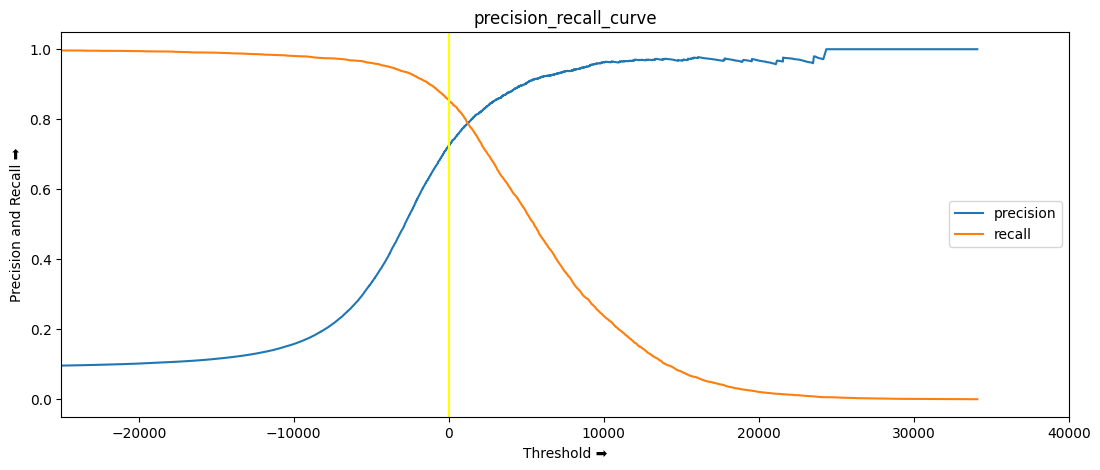

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.figure(figsize=(13, 5))
plt.plot(thresholds, precisions[:-1], label = "precision")
plt.plot(thresholds, recalls[:-1], label = "recall")
plt.axvline(x=0, color = "yellow")
plt.title("precision_recall_curve")
plt.xlabel('Threshold ➡️')
plt.ylabel('Precision and Recall ➡️')
plt.legend()
plt.xlim(-25000, 40000)

plt.show()

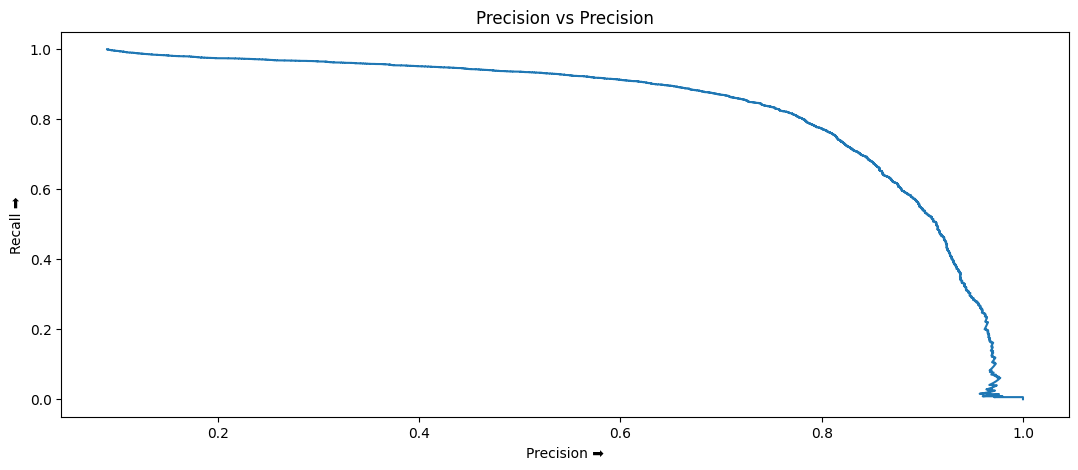

In [22]:
plt.figure(figsize=(13, 5))
plt.plot(precisions, recalls)
plt.title("Precision vs Precision")
plt.xlabel('Precision ➡️')
plt.ylabel('Recall ➡️')

plt.show()

> ### Creating a `Classifier` which having a `Precision = 0.90`

In [23]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print("threshold :", threshold_for_90_precision)

threshold : 4877.135869633361


In [24]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

> `y_train_pred_90` is our new prediction which is done by changing `threshold` value so that we can achieve required `precision` and `recall` values.

In [25]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9002326934264107
0.5447025695177754


> As you can see, it is fairly easy to create a classifier with virtually `any precision` you want: `just set a high enough threshold`, and you’re done.

> If someone says `“let’s reach 99% precision,”` you should ask, `“at
what recall?”`


<hr>

> # **MODEL PERFORMANCE - `ROC Curve`**

>  It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the `true positive rate (another name for recall)` against the `false positive rate`. The `FPR is the ratio of negative instances that are incorrectly classified as positive`. It is equal to one minus the `true negative rate which is the ratio of negative instances that are correctly classified as negative`. The
`TNR is also called specificity`. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.

In [26]:
from sklearn.metrics import roc_curve

tpr, fpr, thresholds = roc_curve(y_train_5, y_scores) # y_scores is the prediction thresholds made by model using cross_val_predict() method

# Here threshold values are in decreasing order
idx = (thresholds <= threshold_for_90_precision).argmax()
# This is an index of threshold where precision = 0.90
tpr_90, fpr_90 = tpr[idx], fpr[idx]

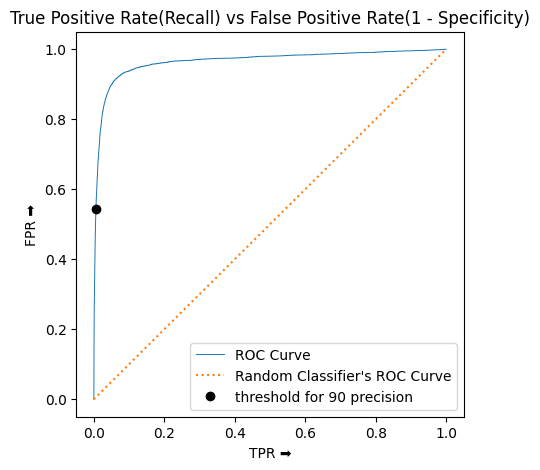

In [27]:
plt.figure(figsize=(5,5))
plt.plot(tpr, fpr, linewidth = 0.7, label = "ROC Curve")
plt.plot([0,1], [0,1], linestyle = 'dotted', label = "Random Classifier's ROC Curve")
plt.plot([tpr_90], [fpr_90], 'ko', label = "threshold for 90 precision")
plt.title("True Positive Rate(Recall) vs False Positive Rate(1 - Specificity)")
plt.xlabel('TPR ➡️')
plt.ylabel('FPR ➡️')
plt.legend()

plt.show()

> Once again there is a `tradeoff`: the `higher the recall (TPR)`, the `more false positives(FPR)` the classifier produces. The dotted line represents the ROC curve of a purely
random classifier; `a good classifier stays as far away from that line as possible (toward the top-left corner)`

> One way to compare classifiers is to measure the `area under the curve (AUC)`. `A per‐fect classifier will have a ROC AUC equal to 1`, whereas a purely random classifier will
have a ROC AUC equal to 0.5.


> ### ROC-AUC Score

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_train_pred_90)

0.7693592054818718

<hr>

> # **SECOND MODEL - `RandomForestClassifier`**

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train_5)
y_pred = rf.predict(X_test)

print(precision_score(y_test_5, y_pred))
print(recall_score(y_test_5, y_pred))

0.9964476021314387
0.8890649762282092


> The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class 

In [30]:
rf_scores = cross_val_predict(
    rf,
    X=X_train, y = y_train_5,
    cv = 3,
    method="predict_proba"
)
rf_scores[:2, :]

array([[1.  , 0.  ],
       [0.99, 0.01]])

> The `1st column` represents the `probability of negative class`, `2nd column` represents the `probability of positive class`.

> ### `precision_recall_curve` and `roc curve`

In [31]:
rf_precisions, rf_recalls, rf_thresholds = precision_recall_curve(y_train_5, rf_scores[:, 1])

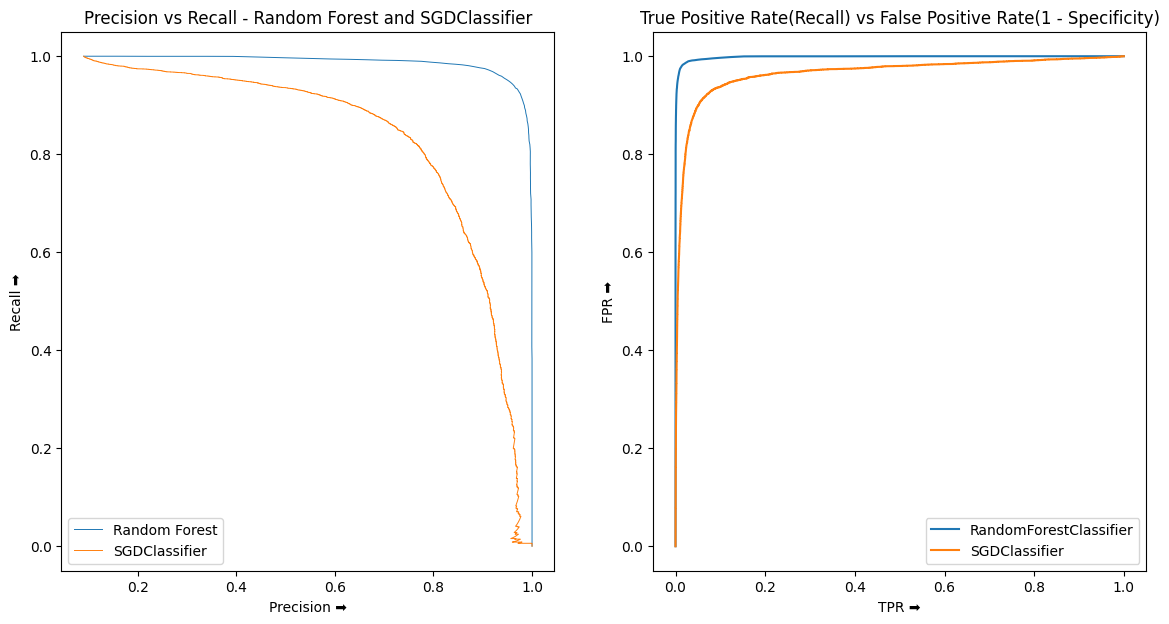

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

fig.set_figwidth(14)
fig.set_figheight(7)

ax[0].plot(rf_precisions, rf_recalls, linewidth = 0.7, label = "Random Forest")
ax[0].plot(precisions, recalls, linewidth = 0.7, label = "SGDClassifier")
ax[0].set_title("Precision vs Recall - Random Forest and SGDClassifier")
ax[0].set_xlabel('Precision ➡️')
ax[0].set_ylabel('Recall ➡️')
ax[0].legend()

rf_tpr, rf_fpr, rf_thresholds = roc_curve(y_train_5, rf_scores[:, 1])

ax[1].plot(rf_tpr, rf_fpr, label = "RandomForestClassifier")
ax[1].plot(tpr, fpr, label = "SGDClassifier")
ax[1].set_title("True Positive Rate(Recall) vs False Positive Rate(1 - Specificity)")
ax[1].set_xlabel('TPR ➡️')
ax[1].set_ylabel('FPR ➡️')
ax[1].legend()

plt.show()

In [33]:
roc_auc_score(y_train_5, rf_scores[:, 1])

0.9984553913445013

> As you can see RandomForestClassifier's PR curve looks much better than SGDClassifier's: it comes `much closer to Top-Right corner`.ROC_AUC score is also significantly better

> You now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall tradeoff that fits your needs, and compare various models using ROC curves and ROC AUC scores.

<hr>

> # **MULTICLASS CLASSIFICATION - `SVM`**

In [34]:
from sklearn.svm import SVC

> ### ONE-VS-ONE STRATEGY

> - Another strategy is to train a binary classifier for every pair of digits: one to distin‐ guish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. <br><br>
> - This is called the `one-versus-one (OvO) strategy`. If there are N classes, you need to train N × (N – 1) / 2 classifiers. <br><br>
> - For the MNIST problem, this means training 45 binary classifiers! `When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels`. <br><br>
> - The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

In [35]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

svm_scores = svm_clf.decision_function(X_train)

In [36]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [72]:
print('Prediction :',svm_clf.classes_[svm_scores[0].argmax()])
print('Actual :', y_train[0])

Prediction : 0
Actual : 5


> ### ONE-VS-ALL STRATEGY

> - One way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then `when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score`. This is called the `one-versus-all (OvA)` strategy (also called one-versus-the-rest).<br><br>
> - Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐
class classification task, and it automatically runs OvA (except for `SVM classifiers` for
which it uses OvO)

In [58]:
from sklearn.multiclass import OneVsRestClassifier

ovr_svm = OneVsRestClassifier(SVC(random_state=42))
ovr_svm.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [68]:
len(ovr_svm.estimators_)

10

In [69]:
print('Prediction :', ovr_svm.predict(X_train.iloc[0:1, :])[0])
print('Actual :', y_train[0])

Prediction : 0
Actual : 5


> - In both `OVR and OVO` the `prediction is wrong` for first row
<br><br>
> - `Support Vector Machines (SVM)` scales poorly with the size of the training set so we can't use it

<hr>

> # **ERROR ANALYSIS**

> Lets take `RandomForestClassifier` for prediction since it shows significant results on both `ROC curve` and `PR curve`

In [73]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

> ### `ConfusionMatrixDisplay`

In [ ]:
y_pred = cross_val_predict(
    RandomForestClassifier(random_state=42),
    X = X_train_scaled,
    y = y_train,
    cv = 3
)

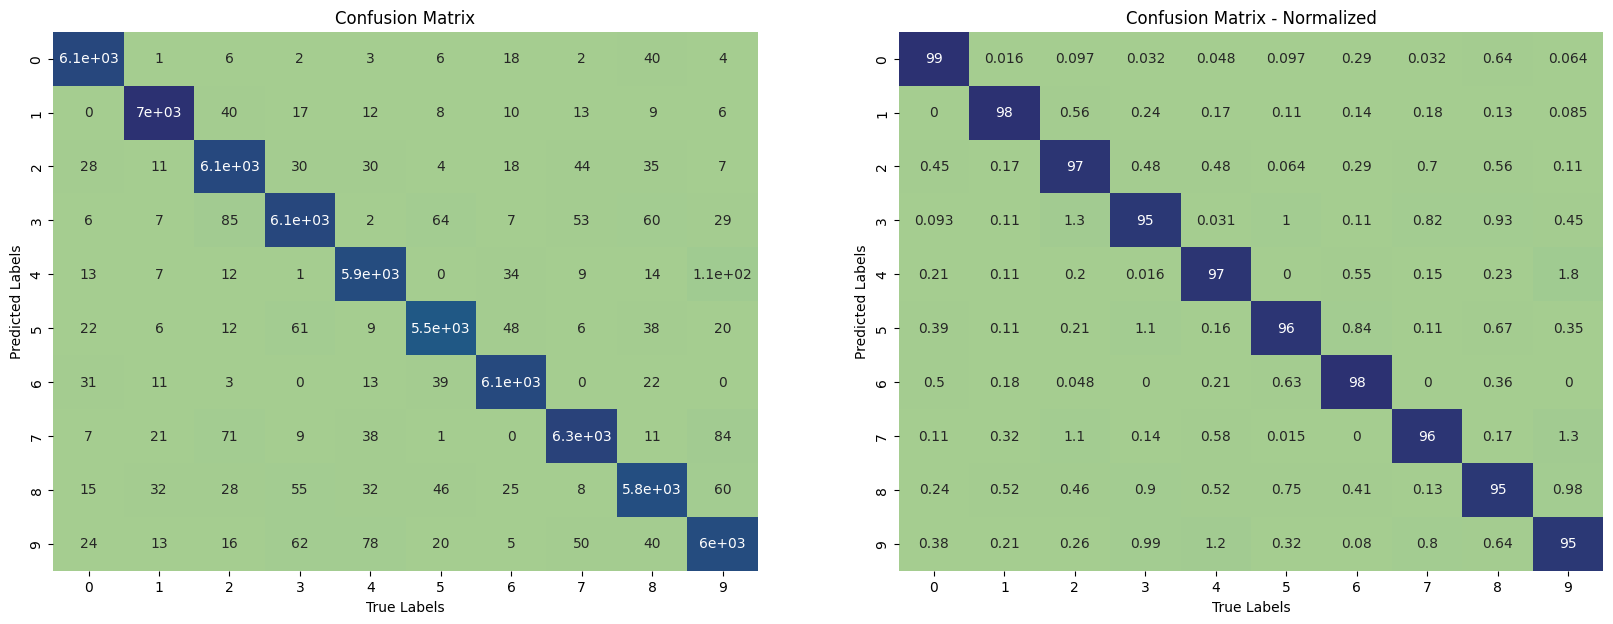

In [117]:
import seaborn as sns

fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_figwidth(20)
fig.set_figheight(7)

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cbar=None, ax=ax[0], cmap='crest')
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("True Labels")
ax[0].set_ylabel("Predicted Labels")

sns.heatmap(confusion_matrix(y_train, y_pred, normalize='true') * 100, annot=True, cbar=None, ax = ax[1], cmap='crest')
ax[1].set_title("Confusion Matrix - Normalized")
ax[1].set_xlabel("True Labels")
ax[1].set_ylabel("Predicted Labels")

plt.rc('font', size=10)  # make fonts great again
plt.show()

> This confusion matrix looks fairly good, since most images are on the `main diagonal`, which means that they were `classified correctly`.

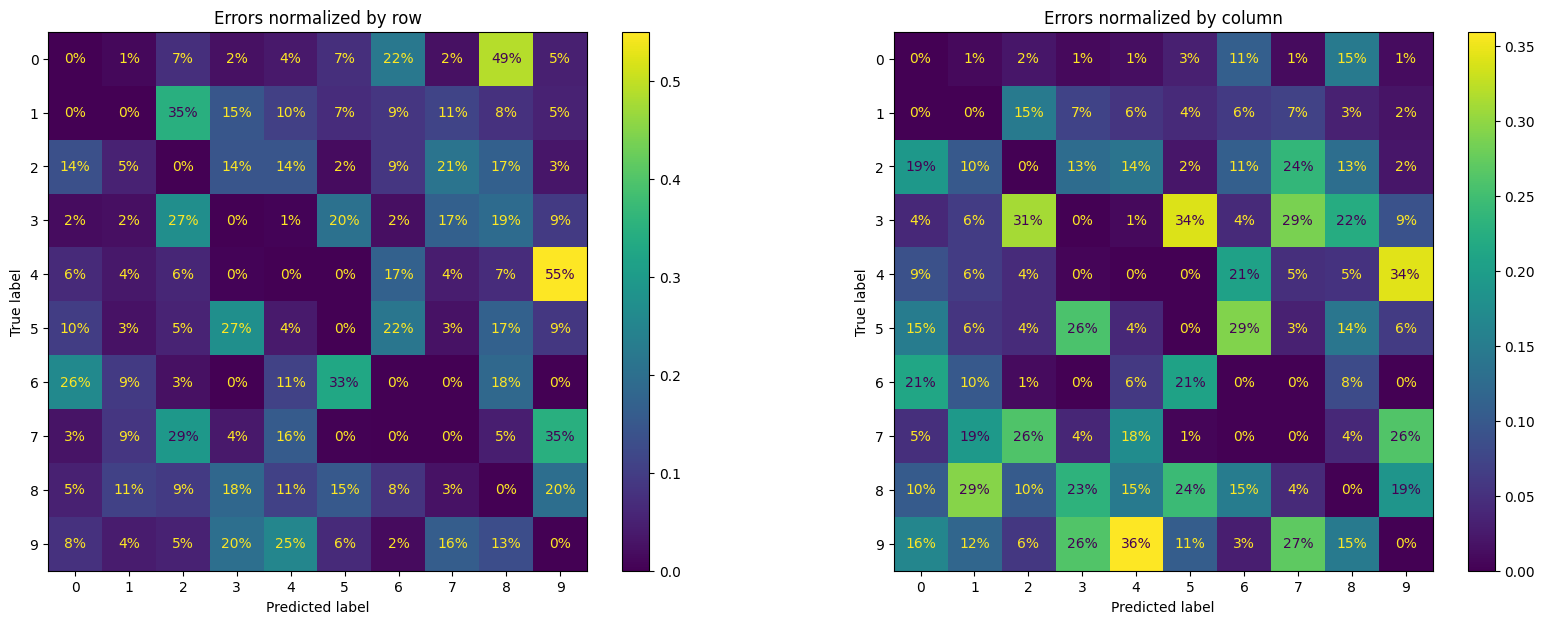

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay

sample_weight = (y_train != y_pred)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
fig.set_figwidth(20)
fig.set_figheight(7)

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
plt.rc('font', size=14)  # make fonts great again

> `Row Normalization` : The 49% in row 0 and column 8 means that 49% Error made my model by predicting 0 insteed of 8

> `Column Normalization` : The 15% in row 0 and column 8 means that 15% of 0's are missclassified as 8

<hr>

> # **MULTILABEL CLASSIFICATION**

> Multi-label classification is a type of classification task where each instance can be associated with multiple labels simultaneously, allowing for the assignment of zero or more labels to a single data point. This is in contrast to traditional classification tasks, where each instance is assigned to one and only one class label.

In [119]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) # Label 1
y_train_odd = (y_train % 2 == 1) # Label 2

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [124]:
y_pred = knn_clf.predict(X_train.iloc[0:1, :])
print("Predicted :", y_pred)
print("Actual :", y_multilabel[0])

Predicted : [[False False]]
Actual : [False False]


In [125]:
f1_score(y_train, y_pred, average="macro")

0.9662710249675888

> ### `ClassifierChain`

> This in scikit-learn is a useful tool for handling multi-label classification problems. In multi-label classification, each instance can be assigned multiple labels simultaneously. The ClassifierChain method extends the standard classification approach to account for the dependencies between labels.

>- Captures label dependencies, which can improve performance compared to treating each label independently. <br><br>
>- Provides a structured approach to multi-label classification problems.

In [126]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(random_state=42), cv = 3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(random_state=42), cv=3, random_state=42)

> The `cross-validation` uses the previous training for next steps

In [129]:
print("Predicted :", chain_clf.predict(X_train.iloc[0:1, :]))
print("Actual :", y_multilabel[0])

Predicted : [[0. 0.]]
Actual : [False False]


<hr>